In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx

In [4]:
matA = [[0,1,0,0,0],[1,0,1,1,1],[0,1,0,1,1],[0,1,1,0,0],[0,1,1,0,0]]

In [9]:
matA = np.array(matA)

In [10]:
G=nx.from_numpy_array(np.array(matA))

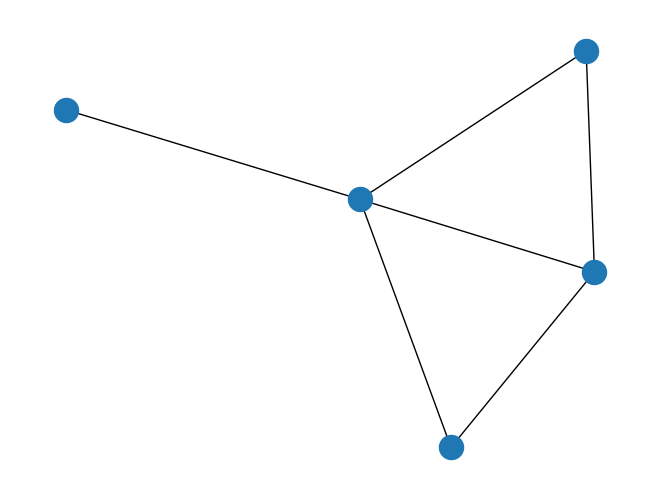

In [11]:
nx.draw(G)

In [ ]:
matW=np.zeros([5,5])
for i in range(5):
        matW[i]=matA[i]/sum(matA[i])

In [13]:
matW

array([[0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.        , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        , 0.        ]])

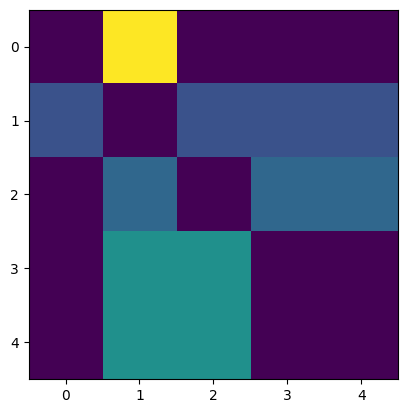

In [14]:
plt.imshow(matW)
plt.show()

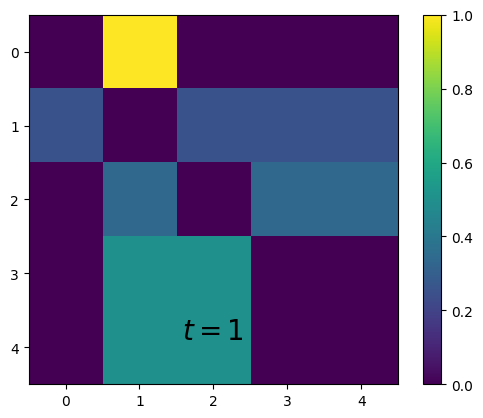

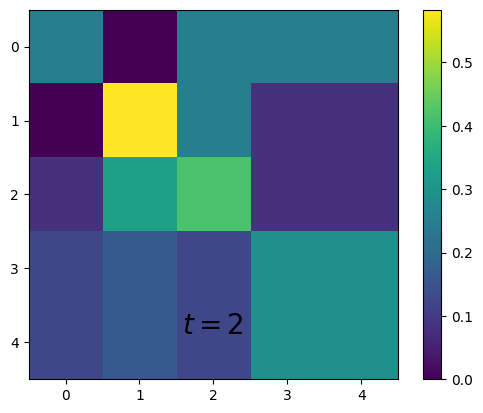

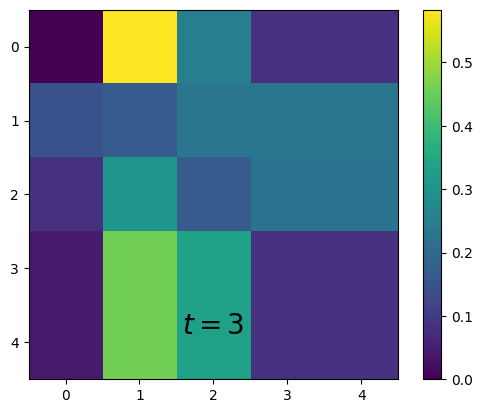

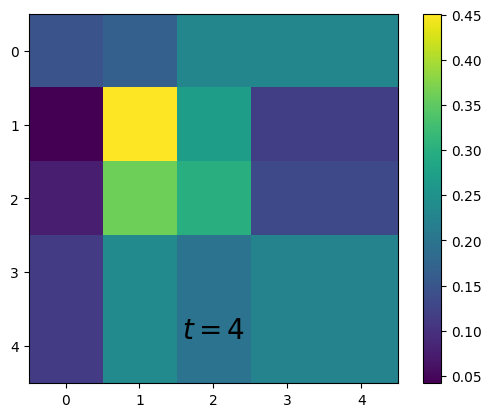

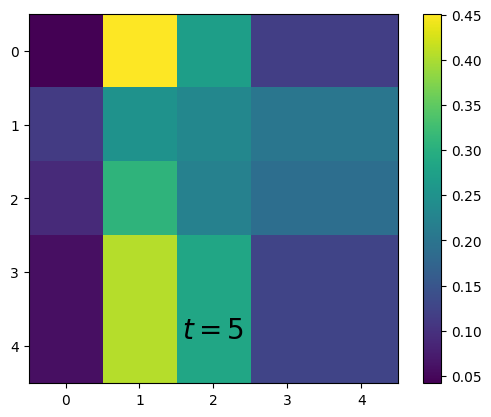

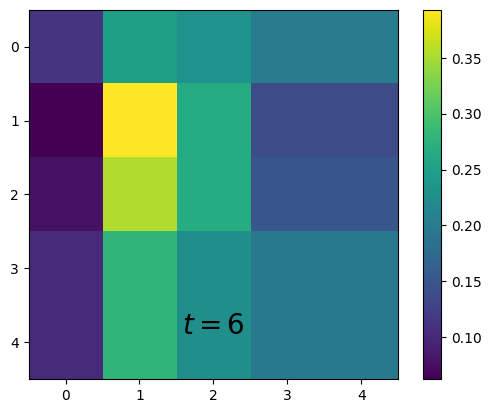

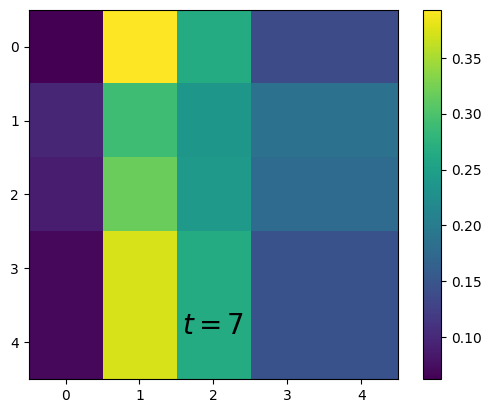

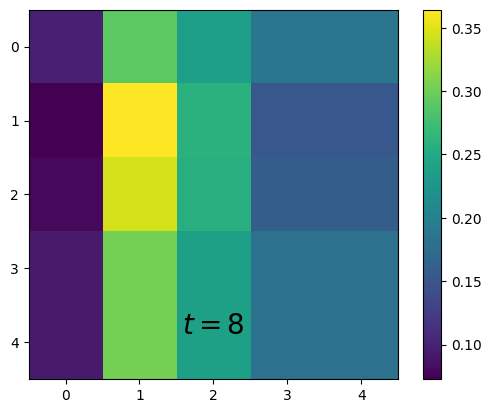

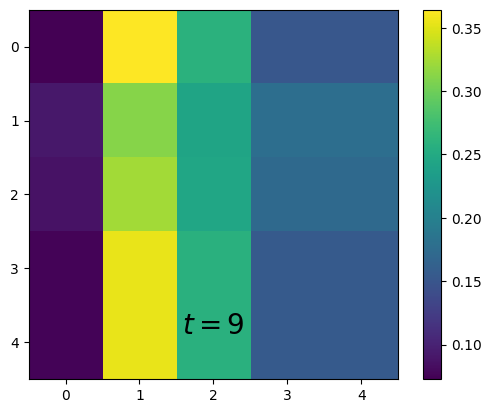

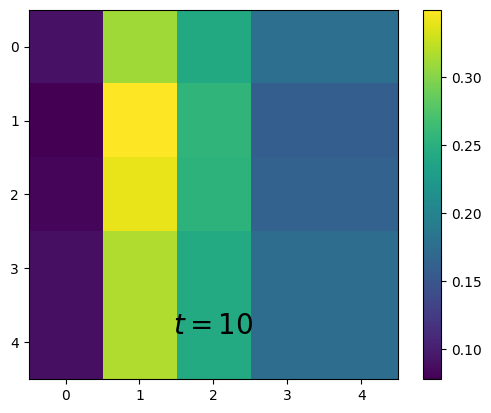

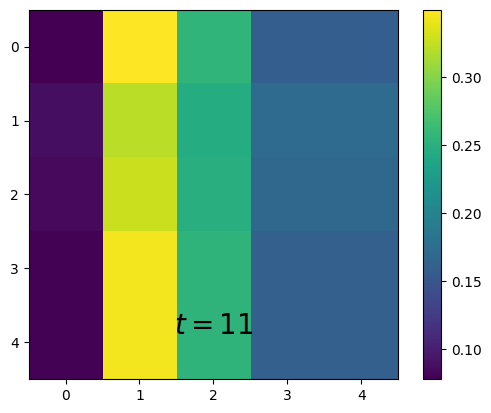

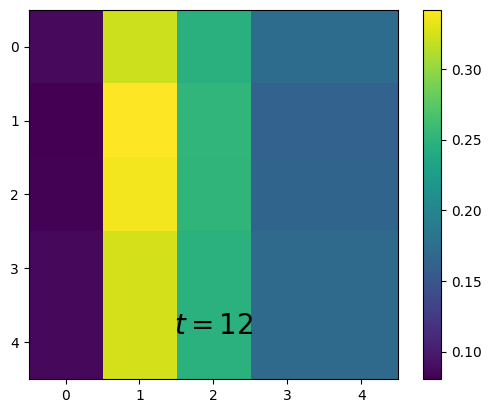

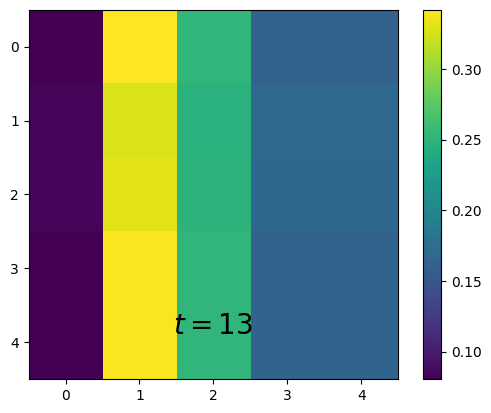

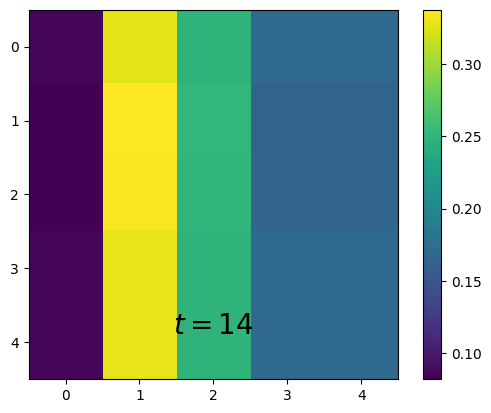

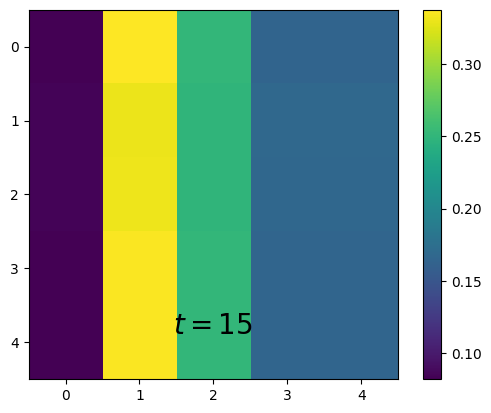

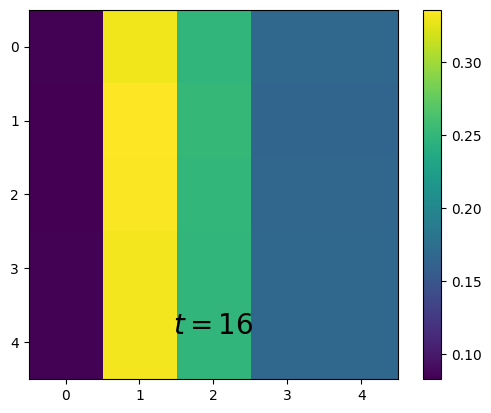

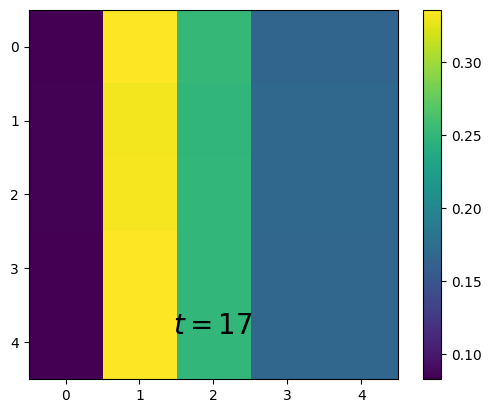

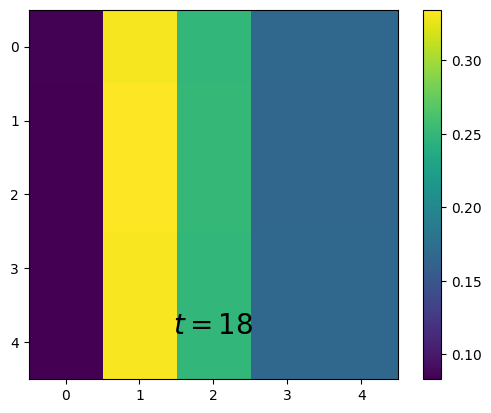

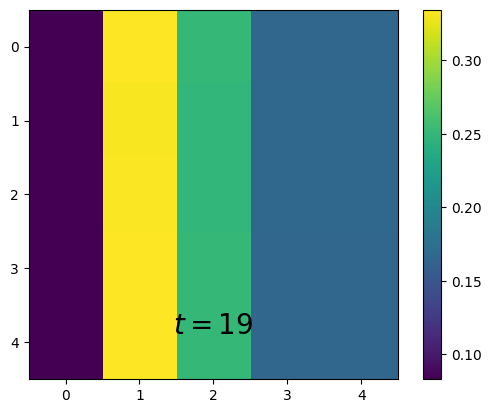

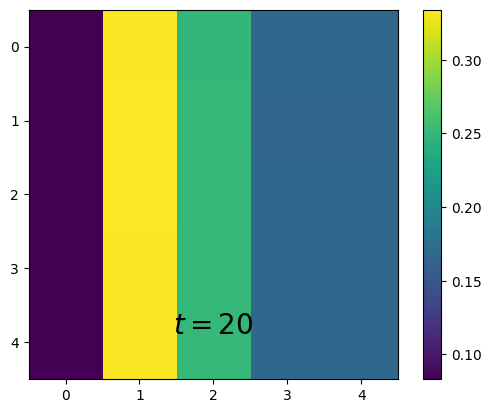

<Figure size 640x480 with 0 Axes>

In [19]:
for t in range(1,21):
    matW_t = np.linalg.matrix_power(matW,t)
    plt.title(r'$t='+str(t)+'$',size=20,y=0.1)
    plt.imshow(matW_t)
    plt.colorbar()
    plt.show()
    plt.clf()

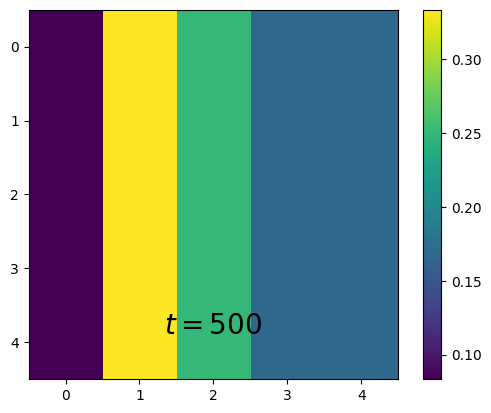

<Figure size 640x480 with 0 Axes>

In [43]:
matW_t = np.linalg.matrix_power(matW,500)
plt.title(r'$t='+str(500)+'$',size=20,y=0.1)
plt.imshow(matW_t)
plt.colorbar()
plt.show()
plt.clf()
#Las probabilidades dependen de j, despúes de mucho tiempo se olvida de la condición inicial (proceso de markov)
#Distribución estacionaria

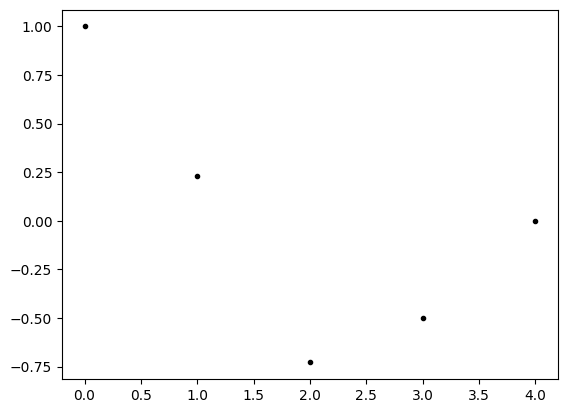

In [23]:
plt.plot(np.linalg.eigvals(matW), '.k')
plt.show()

In [24]:
G1=nx.karate_club_graph()

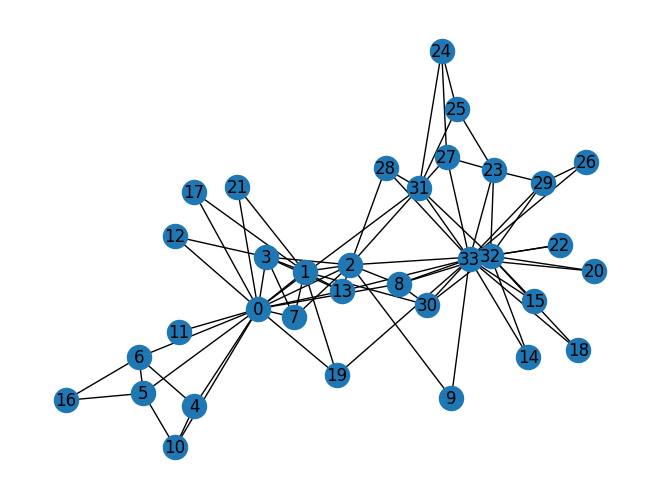

In [27]:
nx.draw(G1,with_labels=True)

In [32]:
matA1 = nx.to_numpy_array(G1,weight=None) #nx.adjacency_matrix(G1)
print(matA1) #Esta sería la matriz de pesos. Se le quita el peso para que sea de adyacencia

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [30]:
matA1.shape

(34, 34)

In [34]:
#Matriz de trancisión
matW1=np.zeros([34,34])
for i in range(34):
        matW1[i]=matA1[i]/sum(matA1[i])

In [35]:
matW1

array([[0.        , 0.0625    , 0.0625    , ..., 0.0625    , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.1       , 0.        , ..., 0.        , 0.1       ,
        0.        ],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.16666667,
        0.16666667],
       [0.        , 0.        , 0.08333333, ..., 0.08333333, 0.        ,
        0.08333333],
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.05882353,
        0.        ]])

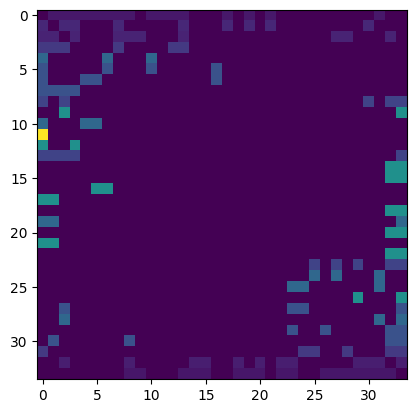

In [44]:
plt.imshow(matW1)
plt.show()

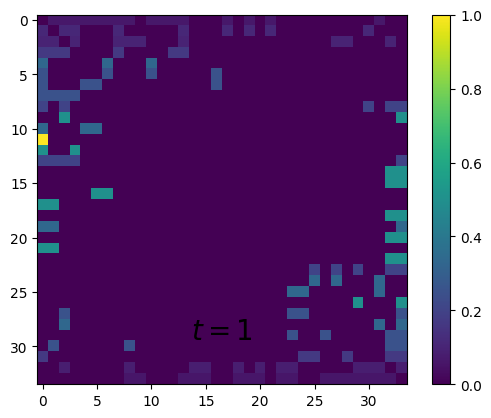

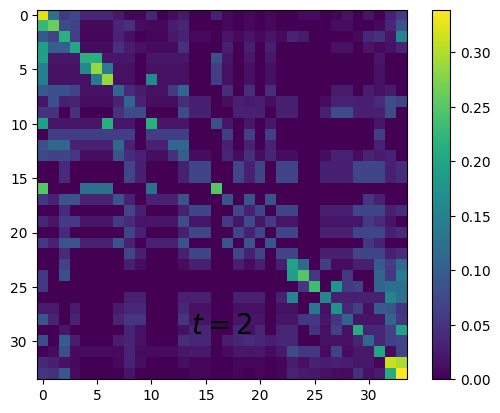

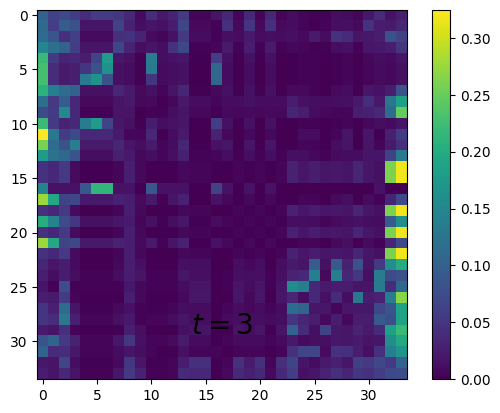

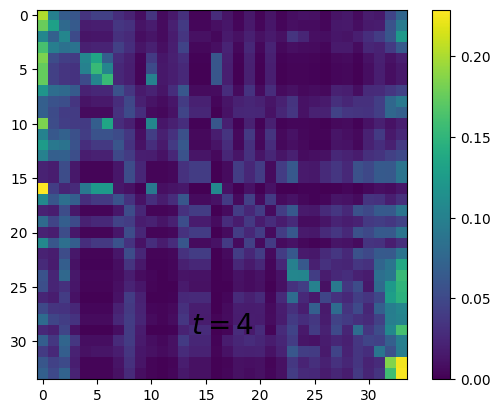

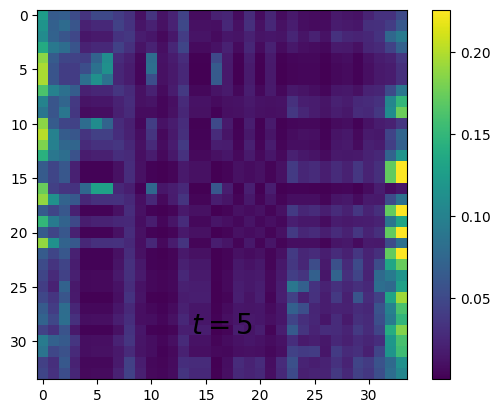

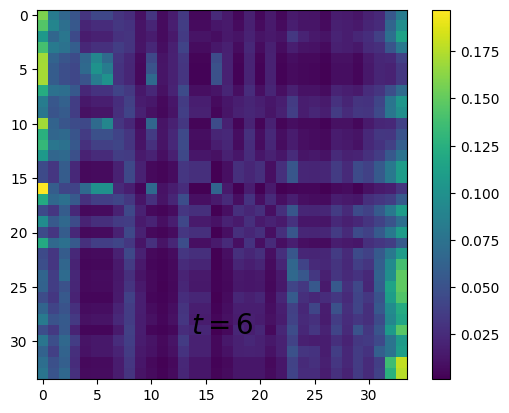

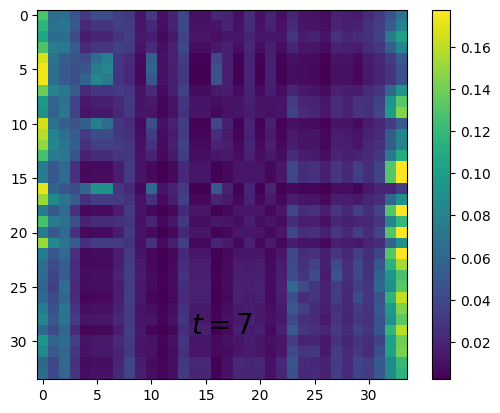

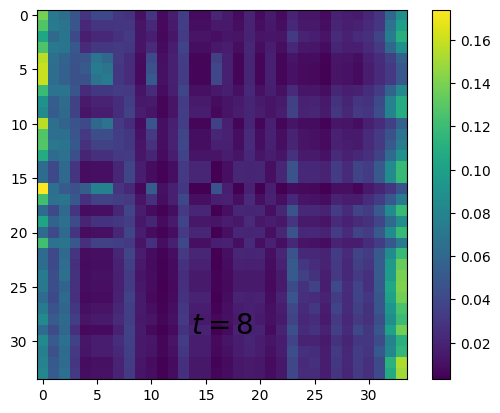

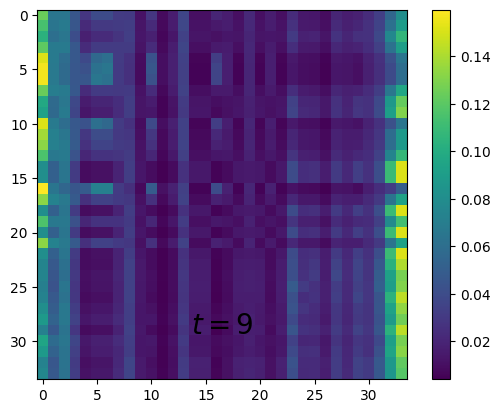

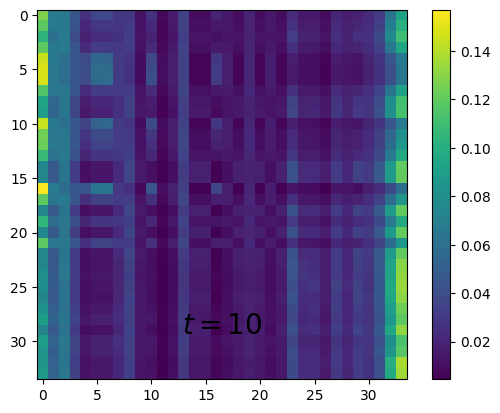

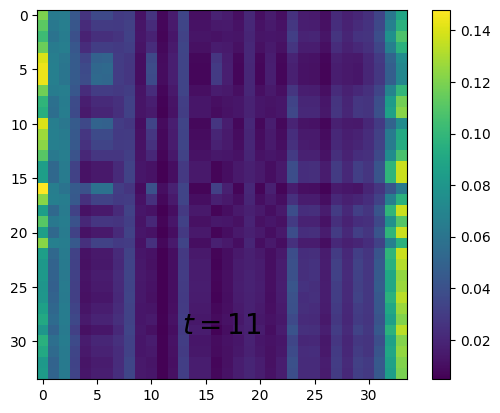

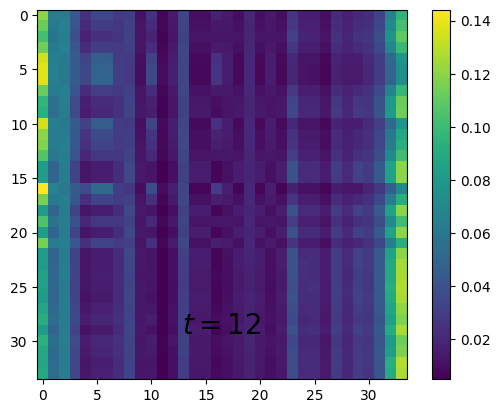

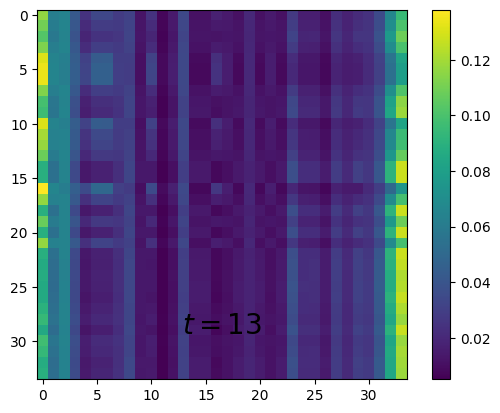

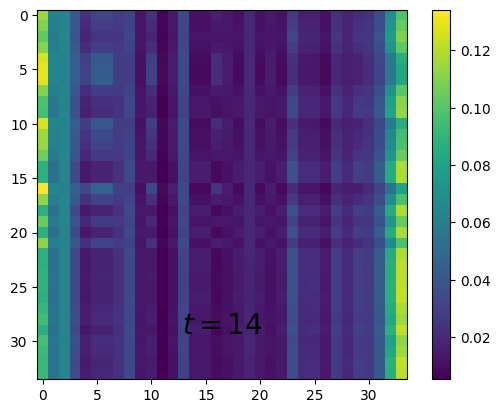

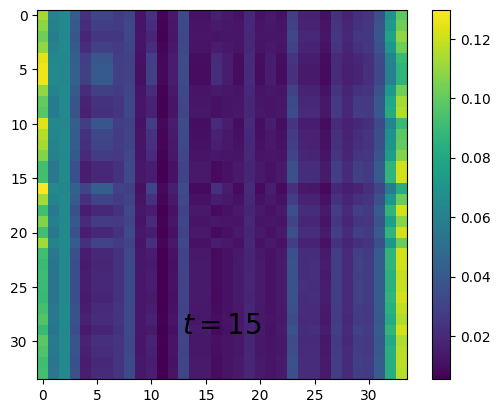

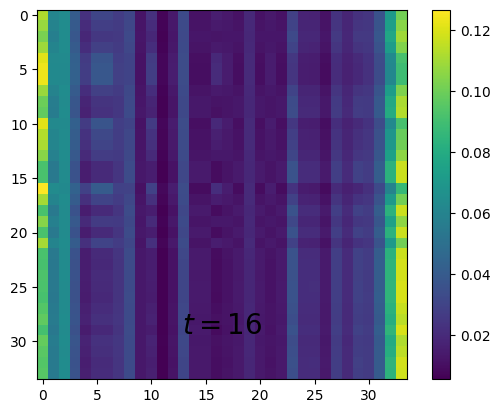

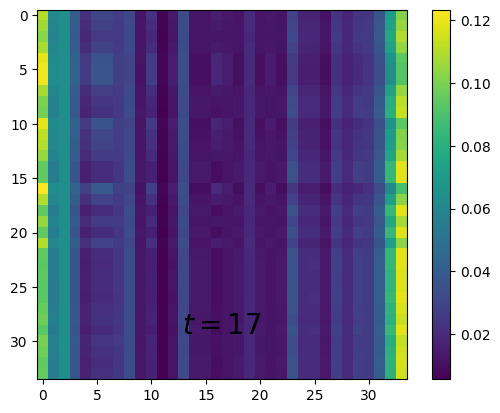

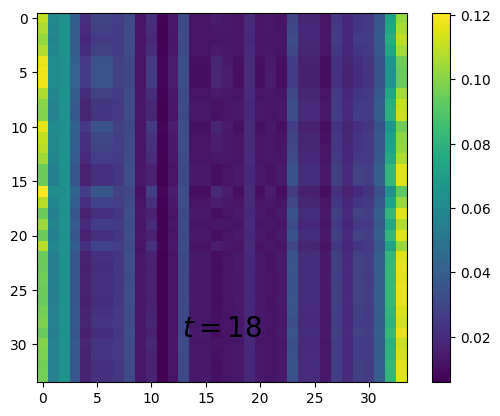

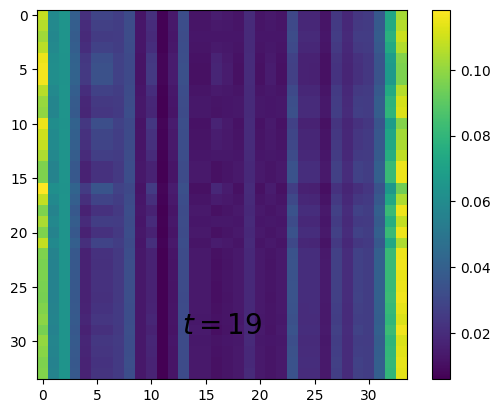

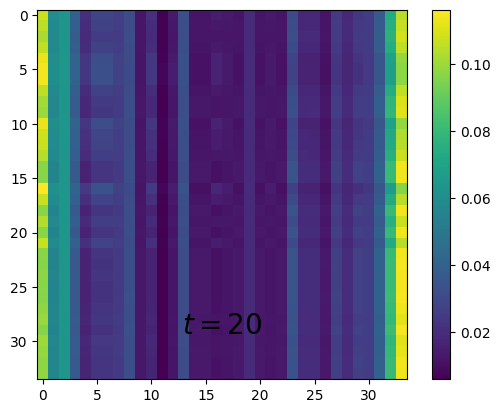

<Figure size 640x480 with 0 Axes>

In [37]:
for t in range(1,21):
    matW_t1 = np.linalg.matrix_power(matW1,t)
    plt.title(r'$t='+str(t)+'$',size=20,y=0.1)
    plt.imshow(matW_t1)
    plt.colorbar()
    plt.show()
    plt.clf()

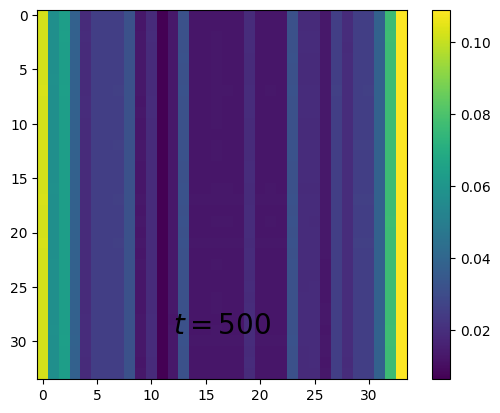

<Figure size 640x480 with 0 Axes>

In [40]:
matW_t1 = np.linalg.matrix_power(matW1,500)
plt.title(r'$t='+str(500)+'$',size=20,y=0.1)
plt.imshow(matW_t1)
plt.colorbar()
plt.show()
plt.clf()

/usr/lib64/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib64/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


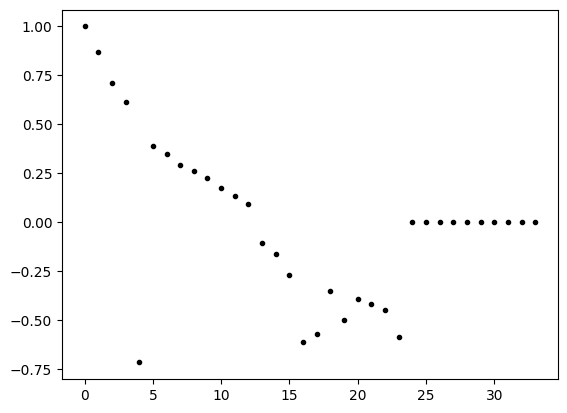

In [39]:
plt.plot(np.linalg.eigvals(matW1), '.k')
plt.show()

In [ ]:
Nv=len(matW1)
np.random.choice(list(range(Nv)),p=matW1[0])

np.int64(4)

In [72]:
#Queremos hallar el tiempo de primer paso T_ij
initial=11
final=33
pos=initial
t=0

while pos != final:
    pos=np.random.choice(list(range(Nv)),p=matW1[pos])
    t+=1
print(pos)
print("Time",t)

33
Time 17


In [64]:
def TPP(initial,final):
    pos=initial
    t=0
    while pos != final:
        pos=np.random.choice(list(range(Nv)),p=matW1[pos])
        t+=1
    return t

In [65]:
Times=[]
for rr in range(100000):
    Times.append(TPP(11,33))

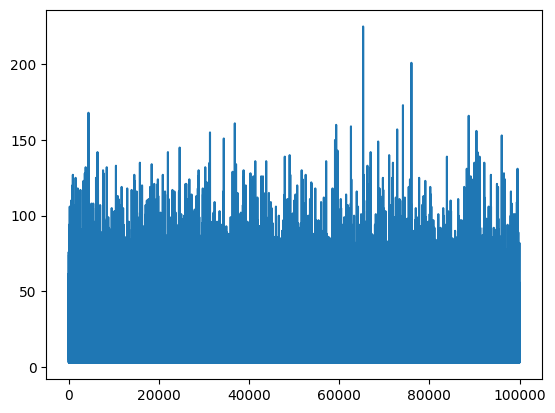

In [68]:
plt.plot(Times)
plt.show()

In [73]:
print(np.mean(Times))

19.95985


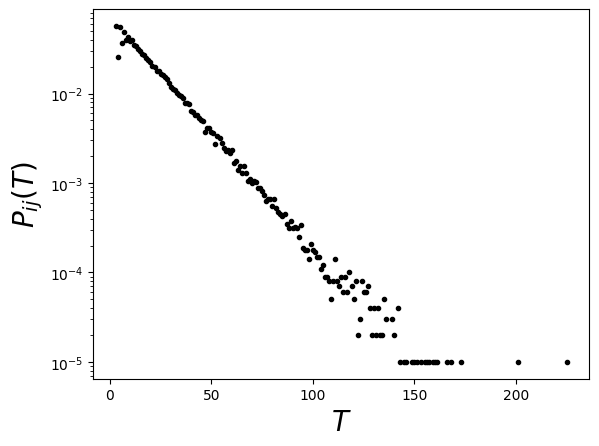

In [75]:
vals,freq=np.unique(Times,return_counts=True)
plt.semilogy(vals,freq/sum(freq),'k.')
plt.xlabel('$T$', size=20)
plt.ylabel(r'$P_{ij}(T)$',size=20)
plt.show()

In [79]:
Times1=[]
for rr in range(100):
    Times1.append(TPP(11,16))

In [80]:
print(np.mean(Times1))

116.68
